In [1]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")
print(tokenizer.get_vocab())
# Encode a text input to get token IDs
encoded_input = tokenizer.tokenize("metaverse")
print(encoded_input)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("01-ai/Yi-34B-Chat")

# Encode a text input to get token IDs
encoded_input = tokenizer.tokenize("metaverse")
print(encoded_input)

/Users/rkyer_chang/dev-personal/llm-research/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'$$': 10811, '▁Ти': 19160, '▁cart': 7548, 'Ty': 12973, '▁Krieg': 19020, '▁thirteen': 26584, 'три': 11163, 'nd': 292, 'oves': 8803, 'edes': 20124, 'minded': 25117, 'ilarly': 12367, '▁Adam': 10534, '▁neighbour': 18583, '▁video': 3798, '▁bond': 9410, '▁biologie': 17149, '▁subtle': 18842, '▁ma': 4128, 'enders': 14930, '▁newly': 12486, 'enburg': 22381, 'others': 15869, 'ában': 17180, 'cription': 2342, 'ктив': 13418, '▁logs': 22898, '▁juillet': 18458, 'Tags': 14283, 'лич': 22184, 'augh': 3740, '▁Night': 10357, '<0xC1>': 196, 'stein': 6559, 'enh': 25449, 'merge': 13180, 'о': 28761, 'idays': 16642, 'ू': 30957, '›': 29525, '▁virtually': 17626, '▁organiz': 6443, '準': 31646, '▁select': 5339, '울': 31758, '▁ing': 4155, 'Company': 24673, '▁imagin': 26671, '▁cope': 27626, '▁causes': 10110, '▁lemon': 23598, '▁Basket': 25258, 'ission': 1937, '▁warehouse': 27954, 'š': 28873, '▁актив': 24735, '二': 29482, 'ど': 30496, '▁voters': 17947, '▁Resources': 20114, 'Product': 7840, 'Sh': 1981, 'oya': 27338, '則': 3

In [6]:
from transformers import AutoTokenizer


def get_vocab(tokenizer_name: str) -> dict:
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
    return tokenizer.get_vocab()


def load_vocab(paths: list[str]) -> None:
    for path in paths:
        vocab = get_vocab(path)

        model_name = path.split("/")[-1]
        with open(f"{model_name}_vocab.txt", "w") as f:
            for word, _ in vocab.items():
                f.write(f"{word}\n")


model_path_list = ["01-ai/Yi-34B-Chat", "mistralai/Mistral-7B-v0.1"]
load_vocab(model_path_list)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


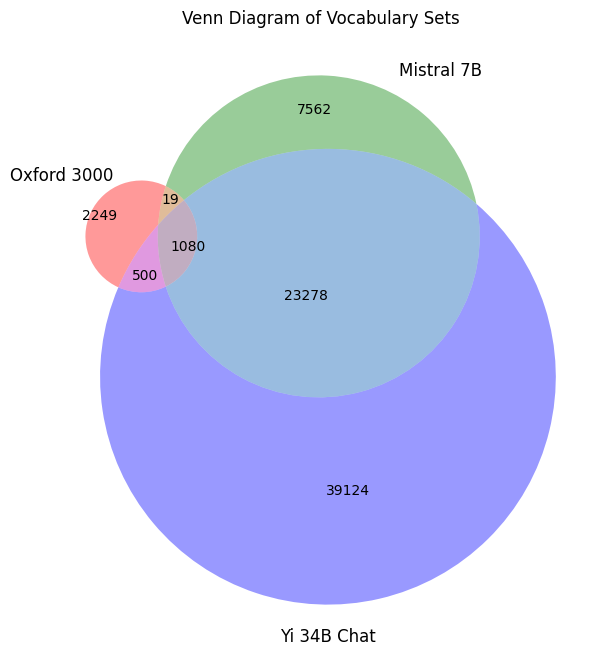

In [25]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt


def get_vocab_set(path: str) -> set:
    with open(path, "r") as f:
        vocab = set(word.strip() for word in f.readlines())
    return vocab


# 讀取詞匯集
oxford_3000 = get_vocab_set("oxford-3000.txt")
mistral_7b = get_vocab_set("Mistral-7B-v0.1_vocab.txt")
yi_34b_chat = get_vocab_set("Yi-34B-Chat_vocab.txt")

# 計算交集
oxford_mistral_intersection = len(oxford_3000 & mistral_7b)
oxford_yi_intersection = len(oxford_3000 & yi_34b_chat)
mistral_yi_intersection = len(mistral_7b & yi_34b_chat)
all_three_intersection = len(oxford_3000 & mistral_7b & yi_34b_chat)

# 使用matplotlib_venn繪製文氏圖
venn_sets = {
    "100": len(oxford_3000)
    - oxford_mistral_intersection
    - oxford_yi_intersection
    + all_three_intersection,
    "010": len(mistral_7b)
    - oxford_mistral_intersection
    - mistral_yi_intersection
    + all_three_intersection,
    "001": len(yi_34b_chat)
    - oxford_yi_intersection
    - mistral_yi_intersection
    + all_three_intersection,
    "110": oxford_mistral_intersection - all_three_intersection,
    "101": oxford_yi_intersection - all_three_intersection,
    "011": mistral_yi_intersection - all_three_intersection,
    "111": all_three_intersection,
}

plt.figure(figsize=(8, 8))
venn3(subsets=venn_sets, set_labels=("Oxford 3000", "Mistral 7B", "Yi 34B Chat"))
plt.title("Venn Diagram of Vocabulary Sets")
plt.show()

0.4106029106029106